In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error as msle
import matplotlib.pyplot as plt

In [69]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('parkinsons.data', sep=',')

df.sample(10)

# Usunięcie nieprawidłowej kolumny (indeks 0)
features = df.drop(['status', df.columns[0]], axis=1)
labels = df['status']

# Podział na zbiory treningowy, testowy i walidacyjny
train_features, temp_features, train_labels, temp_labels = train_test_split(features, labels, test_size=0.3, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(temp_features, temp_labels, test_size=0.33, random_state=42)


# Wyświetlanie rozmiarów zbiorów
print("Rozmiar zbioru treningowego (cechy):", len(features))
print("Rozmiar zbioru treningowego (cechy):", len(train_features))
print("Rozmiar zbioru testowego (cechy):", len(test_features))
print("Rozmiar zbioru walidacyjnego (cechy):", len(val_features))
print("Rozmiar zbioru treningowego (cechy):", len(labels))
print("Rozmiar zbioru treningowego (etykiety):", len(train_labels))
print("Rozmiar zbioru testowego (etykiety):", len(test_labels))
print("Rozmiar zbioru walidacyjnego (etykiety):", len(val_labels))


Rozmiar zbioru treningowego (cechy): 195
Rozmiar zbioru treningowego (cechy): 136
Rozmiar zbioru testowego (cechy): 39
Rozmiar zbioru walidacyjnego (cechy): 20
Rozmiar zbioru treningowego (cechy): 195
Rozmiar zbioru treningowego (etykiety): 136
Rozmiar zbioru testowego (etykiety): 39
Rozmiar zbioru walidacyjnego (etykiety): 20


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [71]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [72]:
labels.info()

<class 'pandas.core.series.Series'>
RangeIndex: 195 entries, 0 to 194
Series name: status
Non-Null Count  Dtype
--------------  -----
195 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [73]:
features.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [74]:
labels.describe()

count    195.000000
mean       0.753846
std        0.431878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

In [75]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [76]:
# Klasyfikator SVM (Support Vector Machines)
svm_classifier = SVC()

# Definiowanie siatki parametrów do strojenia
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Strojenie parametrów za pomocą walidacji krzyżowej
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(val_features, val_labels)

# Najlepsze parametry dla klasyfikatora SVM
svm_best_params = svm_grid_search.best_params_

# Klasyfikator Decision Trees
dt_classifier = DecisionTreeClassifier()

# Definiowanie siatki parametrów do strojenia
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Strojenie parametrów za pomocą walidacji krzyżowej
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(val_features, val_labels)

# Najlepsze parametry dla klasyfikatora Decision Trees
dt_best_params = dt_grid_search.best_params_

# Klasyfikator Random Forest
rf_classifier = RandomForestClassifier()

# Definiowanie siatki parametrów do strojenia
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

# Strojenie parametrów za pomocą walidacji krzyżowej
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(val_features, val_labels)

# Najlepsze parametry dla klasyfikatora Random Forest
rf_best_params = rf_grid_search.best_params_

# Klasyfikator k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier()

# Definiowanie siatki parametrów do strojenia
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Strojenie parametrów za pomocą walidacji krzyżowej
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(val_features, val_labels)

# Najlepsze parametry dla klasyfikatora k-Nearest Neighbors (k-NN)
knn_best_params = knn_grid_search.best_params_

c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [77]:
# Klasyfikator SVM (Support Vector Machines)
svm_classifier = SVC()
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(val_features, val_labels)
svm_best_params = svm_grid_search.best_params_

print ('svm_best_params' ,svm_best_params)

# Klasyfikator Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(val_features, val_labels)
dt_best_params = dt_grid_search.best_params_

print ('dt_best_params' ,dt_best_params)

# Klasyfikator Random Forest
rf_classifier = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(val_features, val_labels)
rf_best_params = rf_grid_search.best_params_

print ('rf_best_params' ,rf_best_params)

# Klasyfikator k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(val_features, val_labels)
knn_best_params = knn_grid_search.best_params_

print ('knn_best_params' ,knn_best_params)

c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


svm_best_params {'C': 0.1, 'kernel': 'linear'}
dt_best_params {'max_depth': None, 'min_samples_split': 2}


c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


rf_best_params {'max_depth': None, 'n_estimators': 100}


c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


knn_best_params {'n_neighbors': 5, 'weights': 'uniform'}


In [78]:
# Klasyfikator SVM (Support Vector Machines)
svm_classifier = SVC(**svm_best_params)
svm_classifier.fit(train_features, train_labels)
svm_predictions = svm_classifier.predict(test_features)
svm_accuracy = msle(test_labels, svm_predictions)

# Metoda Permutation Importance dla klasyfikatora SVM
svm_importance = permutation_importance(svm_classifier, test_features, test_labels, n_repeats=10, random_state=42)
svm_feature_importance = svm_importance.importances_mean

# Klasyfikator Decision Trees
dt_classifier = DecisionTreeClassifier(**dt_best_params)
dt_classifier.fit(train_features, train_labels)
dt_predictions = dt_classifier.predict(test_features)
dt_accuracy = msle(test_labels, dt_predictions)

dt_feature_importance = dt_classifier.feature_importances_

# Klasyfikator Random Forest
rf_classifier = RandomForestClassifier(**rf_best_params)
rf_classifier.fit(train_features, train_labels)
rf_predictions = rf_classifier.predict(test_features)
rf_accuracy = msle(test_labels, rf_predictions)

rf_feature_importance = rf_classifier.feature_importances_

# Klasyfikator k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier(**knn_best_params)
knn_classifier.fit(train_features, train_labels)
knn_predictions = knn_classifier.predict(test_features)
knn_accuracy = msle(test_labels, knn_predictions)

# Wartości cech nie są dostępne bezpośrednio dla k-NN

print('SVM Accuracy:', svm_accuracy)
print('Decision Trees Accuracy:', dt_accuracy)
print('Random Forest Accuracy:', rf_accuracy)
print('k-Nearest Neighbors Accuracy:', knn_accuracy)

SVM Accuracy: 0.0739158482951079
Decision Trees Accuracy: 0.03695792414755395
Random Forest Accuracy: 0.0246386160983693
k-Nearest Neighbors Accuracy: 0.0739158482951079


In [79]:
# Indeksy cech posortowane według ich ważności
svm_feature_indices = np.argsort(svm_feature_importance)[::-1]
dt_feature_indices = np.argsort(dt_feature_importance)[::-1]
rf_feature_indices = np.argsort(rf_feature_importance)[::-1]

# Wydrukowanie najważniejszych cech dla każdego klasyfikatora
print('Najważniejsze cechy dla klasyfikatora SVM:')
for idx in svm_feature_indices:
    print(features.columns[idx])

print()

print('Najważniejsze cechy dla klasyfikatora Decision Trees:')
for idx in dt_feature_indices:
    print(features.columns[idx])
print()

print('Najważniejsze cechy dla klasyfikatora Random Forest:')
for idx in rf_feature_indices:
    print(features.columns[idx])
print()

Najważniejsze cechy dla klasyfikatora SVM:
spread1
MDVP:Flo(Hz)
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
HNR
MDVP:Shimmer(dB)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
PPE
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
RPDE
DFA
spread2
Shimmer:APQ3
D2

Najważniejsze cechy dla klasyfikatora Decision Trees:
PPE
D2
MDVP:APQ
Shimmer:APQ5
MDVP:Jitter(%)
MDVP:Fo(Hz)
spread1
spread2
HNR
NHR
Shimmer:DDA
RPDE
DFA
MDVP:Shimmer(dB)
MDVP:Shimmer
Jitter:DDP
MDVP:PPQ
MDVP:RAP
MDVP:Jitter(Abs)
MDVP:Flo(Hz)
MDVP:Fhi(Hz)
Shimmer:APQ3

Najważniejsze cechy dla klasyfikatora Random Forest:
PPE
spread1
MDVP:Fo(Hz)
MDVP:Fhi(Hz)
D2
MDVP:Flo(Hz)
Jitter:DDP
Shimmer:APQ5
MDVP:Jitter(Abs)
MDVP:APQ
spread2
MDVP:RAP
MDVP:Jitter(%)
MDVP:Shimmer
NHR
DFA
Shimmer:APQ3
Shimmer:DDA
RPDE
MDVP:Shimmer(dB)
MDVP:PPQ
HNR



In [80]:
from sklearn.preprocessing import MinMaxScaler

# Inicjalizacja obiektu normalizacji
scaler = MinMaxScaler()

# Dopasowanie i transformacja danych treningowych
train_features_normalized = scaler.fit_transform(train_features)

# Transformacja danych testowych i walidacyjnych
test_features_normalized = scaler.transform(test_features)
val_features_normalized = scaler.transform(val_features)

In [81]:
# Klasyfikator SVM (Support Vector Machines)
svm_classifier = SVC()

# Definiowanie siatki parametrów do strojenia
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Strojenie parametrów za pomocą walidacji krzyżowej
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(val_features_normalized, val_labels)

# Najlepsze parametry dla klasyfikatora SVM
svm_best_params = svm_grid_search.best_params_

# Klasyfikator Decision Trees
dt_classifier = DecisionTreeClassifier()

# Definiowanie siatki parametrów do strojenia
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Strojenie parametrów za pomocą walidacji krzyżowej
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(val_features_normalized, val_labels)

# Najlepsze parametry dla klasyfikatora Decision Trees
dt_best_params = dt_grid_search.best_params_

# Klasyfikator Random Forest
rf_classifier = RandomForestClassifier()

# Definiowanie siatki parametrów do strojenia
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

# Strojenie parametrów za pomocą walidacji krzyżowej
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(val_features_normalized, val_labels)

# Najlepsze parametry dla klasyfikatora Random Forest
rf_best_params = rf_grid_search.best_params_

# Klasyfikator k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier()

# Definiowanie siatki parametrów do strojenia
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Strojenie parametrów za pomocą walidacji krzyżowej
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(val_features_normalized, val_labels)

# Najlepsze parametry dla klasyfikatora k-Nearest Neighbors (k-NN)
knn_best_params = knn_grid_search.best_params_

c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [82]:
# Klasyfikator SVM (Support Vector Machines)
svm_classifier = SVC()
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=5)
svm_grid_search.fit(val_features_normalized, val_labels)
svm_best_params_normalized  = svm_grid_search.best_params_

print ('svm_best_params_normalized ' ,svm_best_params_normalized )

# Klasyfikator Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(val_features_normalized, val_labels)
dt_best_params_normalized  = dt_grid_search.best_params_

print ('dt_best_params_normalized ' ,dt_best_params_normalized )

# Klasyfikator Random Forest
rf_classifier = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(val_features_normalized, val_labels)
rf_best_params_normalized  = rf_grid_search.best_params_

print ('rf_best_params_normalized ' ,rf_best_params_normalized )

# Klasyfikator k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(val_features_normalized, val_labels)
knn_best_params_normalized = knn_grid_search.best_params_

print ('knn_best_params_normalized ' ,knn_best_params_normalized )

c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


svm_best_params_normalized  {'C': 0.1, 'kernel': 'linear'}
dt_best_params_normalized  {'max_depth': None, 'min_samples_split': 2}
rf_best_params_normalized  {'max_depth': None, 'n_estimators': 100}


c:\Users\jakpi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


knn_best_params_normalized  {'n_neighbors': 3, 'weights': 'distance'}


In [83]:
# Klasyfikator SVM (Support Vector Machines)
svm_classifier = SVC(**svm_best_params_normalized )
svm_classifier.fit(train_features_normalized, train_labels)
svm_predictions = svm_classifier.predict(test_features_normalized)
svm_accuracy = msle(test_labels, svm_predictions)

# Metoda Permutation Importance dla klasyfikatora SVM
svm_importance = permutation_importance(svm_classifier, test_features_normalized, test_labels, n_repeats=10, random_state=42)
svm_feature_importance_normalized = svm_importance.importances_mean

# Klasyfikator Decision Trees
dt_classifier = DecisionTreeClassifier(**dt_best_params_normalized )
dt_classifier.fit(train_features_normalized, train_labels)
dt_predictions = dt_classifier.predict(test_features_normalized)
dt_accuracy = msle(test_labels, dt_predictions)

dt_feature_importance_normalized = dt_classifier.feature_importances_

# Klasyfikator Random Forest
rf_classifier = RandomForestClassifier(**rf_best_params_normalized )
rf_classifier.fit(train_features_normalized, train_labels)
rf_predictions = rf_classifier.predict(test_features_normalized)
rf_accuracy = msle(test_labels, rf_predictions)

rf_feature_importance_normalized = rf_classifier.feature_importances_

# Klasyfikator k-Nearest Neighbors (k-NN)
knn_classifier = KNeighborsClassifier(**knn_best_params_normalized )
knn_classifier.fit(train_features_normalized, train_labels)
knn_predictions = knn_classifier.predict(test_features_normalized)
knn_accuracy = msle(test_labels, knn_predictions)

# Wartości cech nie są dostępne bezpośrednio dla k-NN

print('SVM Accuracy:', svm_accuracy)
print('Decision Trees Accuracy:', dt_accuracy)
print('Random Forest Accuracy:', rf_accuracy)
print('k-Nearest Neighbors Accuracy:', knn_accuracy)



SVM Accuracy: 0.1478316965902158
Decision Trees Accuracy: 0.03695792414755395
Random Forest Accuracy: 0.03695792414755395
k-Nearest Neighbors Accuracy: 0.03695792414755395


In [84]:
# Indeksy cech posortowane według ich ważności
svm_feature_indices = np.argsort(svm_feature_importance_normalized)[::-1]
dt_feature_indices = np.argsort(dt_feature_importance_normalized)[::-1]
rf_feature_indices = np.argsort(rf_feature_importance_normalized)[::-1]

# Wydrukowanie najważniejszych cech dla każdego klasyfikatora
print('Najważniejsze cechy dla klasyfikatora SVM:')
for idx in svm_feature_indices:
    print(features.columns[idx])

print()

print('Najważniejsze cechy dla klasyfikatora Decision Trees:')
for idx in dt_feature_indices:
    print(features.columns[idx])
print()

print('Najważniejsze cechy dla klasyfikatora Random Forest:')
for idx in rf_feature_indices:
    print(features.columns[idx])
print()


Najważniejsze cechy dla klasyfikatora SVM:
PPE
D2
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
MDVP:Fo(Hz)

Najważniejsze cechy dla klasyfikatora Decision Trees:
PPE
D2
Shimmer:APQ5
MDVP:Jitter(%)
MDVP:Fo(Hz)
RPDE
MDVP:Shimmer
MDVP:Fhi(Hz)
DFA
Shimmer:APQ3
spread1
NHR
Shimmer:DDA
MDVP:APQ
MDVP:Shimmer(dB)
HNR
Jitter:DDP
MDVP:PPQ
MDVP:RAP
MDVP:Jitter(Abs)
spread2
MDVP:Flo(Hz)

Najważniejsze cechy dla klasyfikatora Random Forest:
PPE
MDVP:Fo(Hz)
spread1
D2
MDVP:Fhi(Hz)
MDVP:RAP
spread2
NHR
Shimmer:APQ5
Jitter:DDP
MDVP:Flo(Hz)
MDVP:APQ
Shimmer:DDA
MDVP:Jitter(Abs)
MDVP:Jitter(%)
Shimmer:APQ3
RPDE
MDVP:PPQ
DFA
HNR
MDVP:Shimmer
MDVP:Shimmer(dB)



In [85]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('telemonitoring\parkinsons_updrs.data', sep=',')

# Usunięcie nieprawidłowej kolumny (indeks 0)
#df = df.drop(df.columns[0], axis=1)

# Podział na cechy i etykiety
#features = df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)
#labels = df[['motor_UPDRS', 'total_UPDRS']]

features = df.drop([ 'total_UPDRS'], axis=1)
labels = df[['total_UPDRS']]

# Podział na zbiory treningowy, testowy i walidacyjny
train_features, temp_features, train_labels, temp_labels = train_test_split(features, labels, test_size=0.3, random_state=42)
test_features, val_features, test_labels, val_labels = train_test_split(temp_features, temp_labels, test_size=0.33, random_state=42)

# Wyświetlanie rozmiarów zbiorów
print("Rozmiar zbioru treningowego (cechy):", len(train_features))
print("Rozmiar zbioru testowego (cechy):", len(test_features))
print("Rozmiar zbioru walidacyjnego (cechy):", len(val_features))
print("Rozmiar zbioru treningowego (etykiety):", len(train_labels))
print("Rozmiar zbioru testowego (etykiety):", len(test_labels))
print("Rozmiar zbioru walidacyjnego (etykiety):", len(val_labels))

Rozmiar zbioru treningowego (cechy): 4112
Rozmiar zbioru testowego (cechy): 1181
Rozmiar zbioru walidacyjnego (cechy): 582
Rozmiar zbioru treningowego (etykiety): 4112
Rozmiar zbioru testowego (etykiety): 1181
Rozmiar zbioru walidacyjnego (etykiety): 582


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [87]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [88]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_UPDRS  5875 non-null   float64
dtypes: float64(1)
memory usage: 46.0 KB


In [89]:
# Inicjalizacja obiektu normalizacji
scaler = MinMaxScaler()

# Dopasowanie i transformacja danych treningowych
train_features_normalized = scaler.fit_transform(train_features)

# Transformacja danych testowych i walidacyjnych
test_features_normalized = scaler.transform(test_features)
val_features_normalized = scaler.transform(val_features)

In [90]:
features.describe()

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [91]:
labels.describe()

,total_UPDRS
count,5875.000000
mean,29.018942
std,10.700283
min,7.000000
25%,21.371000
50%,27.576000
75%,36.399000
max,54.992000


In [92]:
from sklearn.linear_model import LinearRegression

# Inicjalizacja modelu regresji liniowej
linear_reg = LinearRegression()

# Dopasowanie modelu do danych treningowych
linear_reg.fit(train_features_normalized, train_labels)

# Predykcja na danych treningowych, testowych i walidacyjnych
train_predictions = linear_reg.predict(train_features_normalized)
test_predictions = linear_reg.predict(test_features_normalized)
val_predictions = linear_reg.predict(val_features_normalized)

# Obliczenie średniego błędu kwadratowego (MSE)
train_mse = msle(train_labels, train_predictions)
test_mse = msle(test_labels, test_predictions)
val_mse = msle(val_labels, val_predictions)

# Wyświetlenie wyników
print("msle dla danych treningowych:", train_mse)
print("msle dla danych testowych:", test_mse)
print("msle dla danych walidacyjnych:", val_mse)

msle dla danych treningowych: 0.015065213996236658
msle dla danych testowych: 0.013391510570882606
msle dla danych walidacyjnych: 0.013855165125938011


## conda install -c conda-forge xgboost

In [93]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definicja zestawu parametrów do strojenia
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Inicjalizacja modelu XGBoost
xgb_reg = xgb.XGBRegressor()

# Inicjalizacja obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Dopasowanie modelu do danych treningowych
grid_search.fit(train_features_normalized, train_labels)

# Najlepsze znalezione parametry
best_params = grid_search.best_params_

# Wyświetlenie najlepszych parametrów
print("Najlepsze parametry:", best_params)

# Dopasowanie modelu z najlepszymi parametrami do danych treningowych
xgb_reg_best = xgb.XGBRegressor(**best_params)
xgb_reg_best.fit(train_features_normalized, train_labels)

# Predykcja na danych treningowych, testowych i walidacyjnych z modelem o najlepszych parametrach
train_predictions_xgb_best = xgb_reg_best.predict(train_features_normalized)
test_predictions_xgb_best = xgb_reg_best.predict(test_features_normalized)
val_predictions_xgb_best = xgb_reg_best.predict(val_features_normalized)

# Obliczenie średniego błędu kwadratowego (MSE) dla modelu z najlepszymi parametrami
train_mse_xgb_best = msle(train_labels, train_predictions_xgb_best)
test_mse_xgb_best = msle(test_labels, test_predictions_xgb_best)
val_mse_xgb_best = msle(val_labels, val_predictions_xgb_best)

# Wyświetlenie wyników dla modelu z najlepszymi parametrami
print("msle dla danych treningowych (XGBoost - najlepsze parametry):", train_mse_xgb_best)
print("msle dla danych testowych (XGBoost - najlepsze parametry):", test_mse_xgb_best)
print("msle dla danych walidacyjnych (XGBoost - najlepsze parametry):", val_mse_xgb_best)


Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
msle dla danych treningowych (XGBoost - najlepsze parametry): 9.534688641860589e-06
msle dla danych testowych (XGBoost - najlepsze parametry): 0.00010105657973689513
msle dla danych walidacyjnych (XGBoost - najlepsze parametry): 0.00019764726800766455


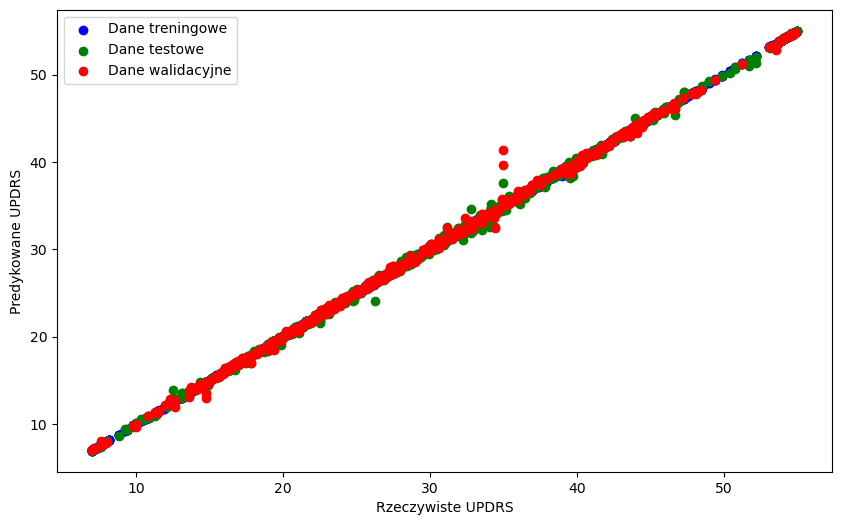

In [94]:
import matplotlib.pyplot as plt

# Tworzenie wykresu dla danych treningowych
plt.figure(figsize=(10, 6))
plt.scatter(train_labels, train_predictions_xgb_best.reshape(-1), color='blue', label='Dane treningowe')

# Tworzenie wykresu dla danych testowych
plt.scatter(test_labels, test_predictions_xgb_best.reshape(-1), color='green', label='Dane testowe')

# Tworzenie wykresu dla danych walidacyjnych
plt.scatter(val_labels, val_predictions_xgb_best.reshape(-1), color='red', label='Dane walidacyjne')

# Dodawanie oznaczeń osi
plt.xlabel('Rzeczywiste UPDRS')
plt.ylabel('Predykowane UPDRS')

# Dodawanie legendy
plt.legend()

# Wyświetlanie wykresu
plt.show()